Decision Tree Accuracy: 100.00%


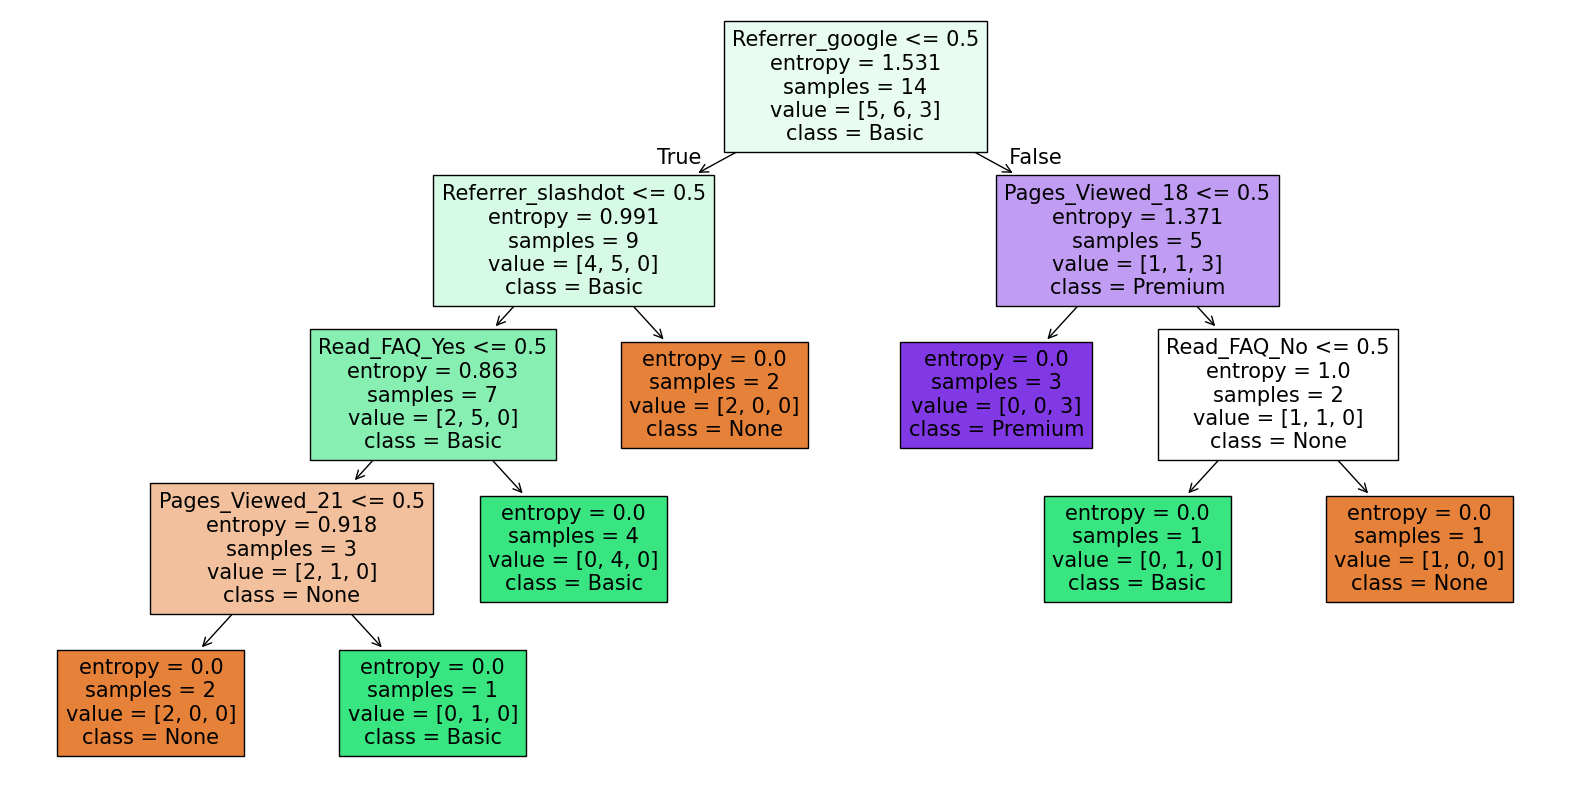

Prediction: [1]


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = {
    'Referrer': ['slashdot', 'google', 'digg', 'kiwitobes', 'google', '(direct)', '(direct)', 'google', 'slashdot', 'digg', 'google', 'kiwitobes', 'digg', 'google', 'kiwitobes'],
    'Location': ['USA', 'France', 'USA', 'France', 'UK', 'New Zealand', 'UK', 'USA', 'France', 'USA', 'UK', 'UK', 'New Zealand', 'UK', 'France'],
    'Read_FAQ': ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes'],
    'Pages_Viewed': ['18', '23', '24', '23', '21', '12', '21', '24', '19', '18', '18', '19', '12', '18', '19'],
    'Service_Chosen': ['None', 'Premium', 'Basic', 'Basic', 'Premium', 'None', 'Basic', 'Premium', 'None', 'None', 'None', 'None', 'Basic', 'Basic', 'Basic']
}

df = pd.DataFrame(data)

# Encode categorical values
df_encoded = pd.get_dummies(df[['Referrer', 'Location', 'Read_FAQ', 'Pages_Viewed']])
y = df['Service_Chosen'].map({'None': 0, 'Basic': 1, 'Premium': 2})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['None', 'Basic', 'Premium'], filled=True)
plt.show()

# Lab 11 | Trained Decision Tree
labInput = pd.DataFrame([{'Referrer': '(direct)', 'Location': 'USA', 'Read_FAQ': 'Yes', 'Pages_Viewed': '5'}])
labEncode = pd.get_dummies(labInput)
# Realign columns
labEncode = labEncode.reindex(columns=X.columns, fill_value=0)
labPred = clf.predict(labEncode)
# 0 = None, 1 = Basic, 2 = Premium
print(f"Prediction: {labPred}")